<a href="https://colab.research.google.com/github/seraffin/FailOmen/blob/master/Wojtek/OPTIMIZER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
# import keras

# Helper libraries
import matplotlib.pyplot as plt

from scipy.optimize import minimize

**OPTIMIZER:**

In [0]:
def optimizer(func, steps, minMax1, minMax2=False, split = 4, reduceSplit = False, searchMaximum = True):
  """
  -------------------------------
  Function can take 1 or 2 parameters to optimization.
  Default: 2 parameters (you need to set values for minMax1 and minMax2)
           For 1 parameter optimization set argument: "minMax2 = False"

  -------------------------------
  minMax1/2   -->  list of min and max value of parameters to begin with (ex. [min, max])
  steps       -->  number of iterations of recurency
  spit        -->  number of parts in which function will split values of parameters
                   higher value -> better accuracy & longer calculation time
                   (Values range 2 -- 10)
  reduceSplit -->  If True: with every repetition of recurency will reduce split by one
  
  -------------------------------
  """
  plotData = []
  iterationCounter = 0
  iterationsLeft = steps
  recurencyCounter = 0
  bestResult = None
  print(iterationsLeft)
  
  #--------------------

  def returnStepList(minValue, maxValue, nrSteps):
      step = math.fabs(maxValue - minValue)/nrSteps
      actualMin = min([minValue, maxValue])
      actualMax = max([minValue, maxValue])
      return [actualMin + step*nr for nr in range(nrSteps + 1)]

  def resetIterators():
    global plotData
    global iterationCounter
    global recurencyCounter
    plotData = []
    iterationCounter = 0
    recurencyCounter = 0


  def create_plot_optimizer(x_data, y_data=0, xLabel = 'X', yLabel = 'Y'):
      import matplotlib.pyplot as plt
      if y_data == 0:  
          unzip = list(zip(*x_data))
          x_data, y_data = unzip[0],unzip[1]
      plt.plot(x_data, y_data)
      plt.xlabel(xLabel)
      plt.ylabel(yLabel)
      plt.show()


  def optimize(func, steps, minMax1, minMax2 = False, split = 4, reduceSplit = False, 
               searchMaximum = True, iLeft = None):
      
      global resetIterators
      global iterationCounter
      global iterationsLeft
      global recurencyCounter
      global bestResult
      
      localICounter = 0
      iL = iLeft
      sMax = searchMaximum
      singleParam = False
      bestPair = [None, None]
      resultList = []
      parametersList=[]

      if reduceSplit is False:
        newSplit = split
      else:
        if split > 2:
          newSplit = split - 1
        else:
          newSplit = 2
      if split > 10:
        raise ValueError("Too big value of 'split' parameter! This would highly increase number of iterations")
      if minMax2 is False:
        singleParam = True

      recurencyCounter += 1

      if isinstance(minMax1, list):

          stepList1 = returnStepList(minMax1[0], minMax1[1], split)
          if singleParam:
            stepList2 = [1]
          else:
            stepList2 = returnStepList(minMax2[0], minMax2[1], split)
          
          nrIterations = len(stepList1)*len(stepList2)
          i1 = 0
          i2 = 0



          for el1 in stepList1:
              i2 = 0
              for el2 in stepList2:
                  iterationCounter += 1
                  localICounter += 1
                  print("---Iteration: {0}/{1} ----Recurency: {2}/{3}".format(localICounter, 
                                                              nrIterations,
                                                              recurencyCounter,
                                                              iL))

                  #----function----
                  if singleParam:
                    evaluation = func(el1)
                  else:
                    evaluation = func(el1, el2)
                  #----function----

                  if len(resultList) > 0:
                      #----condition----
                      if sMax:
                        if evaluation >= max(resultList):
                            bestPair[0] = i1
                            bestPair[1] = i2
                      else:
                        if evaluation <= min(resultList):
                            bestPair[0] = i1
                            bestPair[1] = i2

                      #----condition----

                  else:
                    if singleParam:
                      bestPair[0] = i1
                    else:
                      bestPair[0] = i1
                      bestPair[1] = i2

                  plotData.append([evaluation, iterationCounter])

                  resultList.append(evaluation)
                  if singleParam:
                    parametersList.append([el1])
                  else:
                    parametersList.append([el1, el2])

                  i2 += 1
              i1 += 1

          #------------------------------------------------


          if bestPair[0] == stepList1.index(stepList1[0]):
              minMax1[0] = stepList1[bestPair[0]]/2
              minMax1[1] = stepList1[bestPair[0] + 1]
  #                 print("best values of PARAM_1 are close to MIN value")

          elif bestPair[0] == stepList1.index(stepList1[-1]):
              minMax1[0] = stepList1[bestPair[0] - 1]
              minMax1[1] = stepList1[bestPair[0]]*2
  #                 print("best values of PARAM_1 are close to MAX value")


          else:
              minMax1[0] = stepList1[bestPair[0] - 1]
              minMax1[1] = stepList1[bestPair[0] + 1]

          #------------------------------------------------
          if not singleParam:
            if bestPair[1] == stepList2.index(stepList2[0]):
                minMax2[0] = stepList1[bestPair[1]]/2
                minMax2[1] = stepList1[bestPair[1] + 1]
  #                 print("best values of PARAM_2 are close to MIN value")

            elif bestPair[1] == stepList2.index(stepList2[-1]):
                minMax2[0] = stepList1[bestPair[1] - 1]
                minMax2[1] = stepList1[bestPair[1]]*2
  #                 print("best values of PARAM_2 are close to MAX value")


            else:
                minMax2[0] = stepList2[bestPair[1] - 1]
                minMax2[1] = stepList2[bestPair[1] + 1]

          #------------------------------------------------
          if sMax:
            result = max(resultList)
            param1 = parametersList[resultList.index(max(resultList))][0]
            if not singleParam:
              param2 = parametersList[resultList.index(max(resultList))][1]
          else:
            result = min(resultList)
            param1 = parametersList[resultList.index(min(resultList))][0]
            if not singleParam:
              param2 = parametersList[resultList.index(min(resultList))][1]
                    
          if steps > 0:
            if singleParam:
              print("---------------------------------------------------------\n")
              optimize(func,
                       steps - 1,
                       [minMax1[0],minMax1[1]],
                       minMax2 = False,
                       split = newSplit,
                       reduceSplit=reduceSplit,
                       searchMaximum = sMax,
                       iLeft = iL )
            else:
              print("---------------------------------------------------------\n")
              optimize(func,
                       steps - 1,
                       [minMax1[0], minMax1[1]],
                       minMax2=[minMax2[0], minMax2[1]],
                       split = newSplit,
                       reduceSplit=reduceSplit,
                       searchMaximum = sMax,
                       iLeft = iL)
            
          else:
            if singleParam:
              print('\n------------------ACHIEVED RESULTS------------------\n')
              print("{:<20}{}\n{:<20}{}\n".format('RESULT: ',
                                                  result,
                                                  'PARAMETER 1: ',
                                                  param1))
              return [result, param1]
            else:
              print('\n------------------ACHIEVED RESULTS------------------\n')
              print("{:<20}{}\n{:<20}{}\n{:<20}{}\n".format('RESULT: ',
                                                            result,
                                                            'PARAMETER 1: ',
                                                            param1,
                                                            'PARAMETER 2: ',
                                                            param2))
              return [result, param1, param2]

      else:
          print("enter correct value!")
         
  resetIterators()
  result = optimize(func,
                    steps,
                    minMax1,
                    minMax2,
                    split,
                    reduceSplit,
                    searchMaximum = searchMaximum,
                    iLeft = steps+1)
  xData = [num[1] for num in plotData]
  yData = [num[0] for num in plotData]
  create_plot_optimizer(xData, yData, 'Iterations', 'Result')
  return result


**EXAMPLE:**

12
---Iteration: 1/11 ----Recurency: 1/13
---Iteration: 2/11 ----Recurency: 1/13
---Iteration: 3/11 ----Recurency: 1/13
---Iteration: 4/11 ----Recurency: 1/13
---Iteration: 5/11 ----Recurency: 1/13
---Iteration: 6/11 ----Recurency: 1/13
---Iteration: 7/11 ----Recurency: 1/13
---Iteration: 8/11 ----Recurency: 1/13
---Iteration: 9/11 ----Recurency: 1/13
---Iteration: 10/11 ----Recurency: 1/13
---Iteration: 11/11 ----Recurency: 1/13
---------------------------------------------------------

---Iteration: 1/10 ----Recurency: 2/13
---Iteration: 2/10 ----Recurency: 2/13
---Iteration: 3/10 ----Recurency: 2/13
---Iteration: 4/10 ----Recurency: 2/13
---Iteration: 5/10 ----Recurency: 2/13
---Iteration: 6/10 ----Recurency: 2/13
---Iteration: 7/10 ----Recurency: 2/13
---Iteration: 8/10 ----Recurency: 2/13
---Iteration: 9/10 ----Recurency: 2/13
---Iteration: 10/10 ----Recurency: 2/13
---------------------------------------------------------

---Iteration: 1/9 ----Recurency: 3/13
---Iteration: 2/9 -

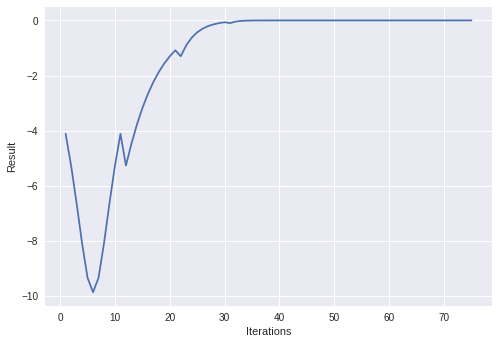

In [4]:
def exampleFunction(x, y = 5):
  return ((-20)* math.exp((((0.5*(x**2 + y**2))**0.5)*(-0.2))))


optimizer(exampleFunction, 12 , [-10,10], minMax2=False,  split = 10, reduceSplit = True, searchMaximum = True)
